## PyTorch Tutorial!!!
In this assignment, you will be familiarized with the usage of the PyTorch library and how to build a model in two ways  
It's quite similar to TensorFlow
*   using the inbuilt layers in pytorch
*   using custom layers to replicate the same result

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
# Using the GPU if it exists
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cpu


### Loading and preprocessing the Data
We will directly be using the dataset included in literally any library that exists. MNIST really is THAT popular.  
Link: https://docs.pytorch.org/vision/0.9/datasets.html#mnist

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)


## Making a simple feedforward network

The following is a simple feedforward model with three layers:
* a flatten layer to convert our 28x28 images into a single array of length 784
* a dense layer of 128 neurons with the relu activation function
* finally a dense layer of 10 neurons with the softmax activation to get a distribution between the digits

In [7]:
# Build the model
SequentialNet = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)


### Training and Testing loops

In [5]:
# Training loop
def train(model, loader, optimizer, loss_fn, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            logits = model(x)
            loss = loss_fn(logits, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# Testing loop
def test(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            pred = logits.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += y.size(0)
    print(f"Accuracy: {100 * correct / total:.2f}%")


### Training the sequential model

In [9]:
print("\nTraining SequentialNet")
sequential_model = SequentialNet.to(device)
optimizer_seq = optim.Adam(sequential_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


train(sequential_model, train_loader, optimizer_seq, loss_fn)
test(sequential_model, test_loader)



Training SequentialNet
Epoch 1, Loss: 76.4400
Epoch 2, Loss: 65.9580
Epoch 3, Loss: 59.0919
Epoch 4, Loss: 55.6763
Epoch 5, Loss: 49.7690
Accuracy: 97.49%


### Manually building the same network from scratch
You can use the simple sequential model we described above as a reference.

In [14]:
# Custom model
class ManualNet(nn.Module):
    def __init__(self):
        super(ManualNet, self).__init__()
        # Layer 1 (784, 128)
        self.lin1w = nn.Parameter(torch.randn(784,128))
        nn.init.xavier_uniform_(self.lin1w)
        self.lin1b = nn.Parameter(torch.zeros(128))
        # Layer 2 (128, 64)
        self.lin2w = nn.Parameter(torch.randn(128,64))
        nn.init.xavier_uniform_(self.lin2w)
        self.lin2b = nn.Parameter(torch.zeros(64))
        # Layer 3 (64, 10)
        self.lin3w = nn.Parameter(torch.randn(64,10))
        nn.init.xavier_uniform_(self.lin3w)
        self.lin3b = nn.Parameter(torch.zeros(10))

    def forward(self, x):
        x = x.view(-1, 784)
        x = x @ self.lin1w + self.lin1b
        x = nn.functional.relu(x)
        x = x @ self.lin2w + self.lin2b
        x = nn.functional.relu(x)
        x = x @ self.lin3w + self.lin3b
        return x


### Training the manual model

In [ ]:
print("\nTraining ManualNet")
model = ManualNet()
opt = optim.SGD(model.parameters(), lr=0.001)
loss_fun = nn.functional.cross_entropy

train(model, train_loader, opt, loss_fun, 20)
test(model, test_loader)
 


Training ManualNet
Epoch 1, Loss: 1507.1938
Epoch 2, Loss: 755.8504
Epoch 3, Loss: 540.1214
Epoch 4, Loss: 452.2610
Epoch 5, Loss: 404.7135
Epoch 6, Loss: 373.9002
Epoch 7, Loss: 352.2083
Epoch 8, Loss: 335.6192
Epoch 9, Loss: 322.4906
Epoch 10, Loss: 311.3803
Epoch 11, Loss: 302.3081
Epoch 12, Loss: 293.8346
Epoch 13, Loss: 286.4555
Epoch 14, Loss: 279.9848
Epoch 15, Loss: 273.9474
Epoch 16, Loss: 268.1008
Epoch 17, Loss: 262.8255
Epoch 18, Loss: 258.0751
Epoch 19, Loss: 253.5321
Epoch 20, Loss: 249.2230
Accuracy: 92.45%


### Visualize the outputs of the models

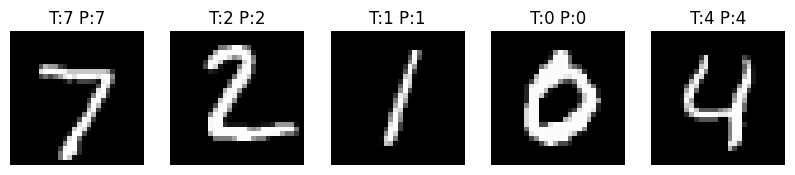

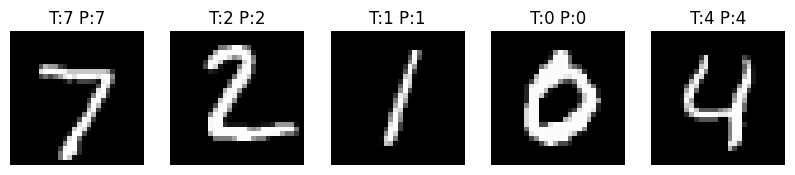

In [23]:
def visualize(model, loader, n=5):
    model.eval()
    x, y = next(iter(loader))
    x, y = x.to(device), y.to(device)
    preds = model(x).argmax(dim=1)

    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(x[i].cpu().squeeze(), cmap='gray')
        plt.title(f"T:{y[i].item()} P:{preds[i].item()}")
        plt.axis('off')
    plt.show()

visualize(model, test_loader)
visualize(sequential_model, test_loader)


## Assignment
* Load and preprocess CIFAR100 dataset (not CIFAR10)
* Build a feedforward network for it. You can experiment around with number of layers and and neurons in each layer and different activation functions
* You are allowed to use nn.functional. (convolutions _might_ make your accuracy better)

# Bonus Assignment
* Try the solving the "Titanic Survival Prediction" dataset from kaggle